<a href="https://colab.research.google.com/github/aditya26091999/genetic-algo-team-selection/blob/master/genetic_algorithm_teamselection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies and Dataset retrieval



In [547]:
!pip install termcolor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored
import random as rn
from operator import itemgetter
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import csv

In [548]:
#loading the dataset from Github folder
datasetUrl = 'https://raw.githubusercontent.com/aditya26091999/genetic-algo-team-selection/master/SCOA_Dataset.csv?token=AMREUDDVJU5V7C4F63OWOS3AZWFSM'
dataset = pd.read_csv(datasetUrl)

#checking the dataset loaded from Github
display(dataset.head())

,Timestamp,Name,Email,User Interface (UI) [UI],API (Server Side programming) [API],Languages [Language],Tools [Tools],Databases [DB],Cloud [Cloud],Artificial Intelligence [AI],Internet of Things [IOT],Testing [Testing],Overview of your skillset [SkillSet]
0,5/22/2021 10:53:05,Aditya Kawale,adityamkawale@gmail.com,"HTML, CSS, JavaScript, Angular, React, Bootstrap","Flask, Django, Anvil","Python, Java","Jenkins, Docker, Git, JIRA","MySQL, Oracle, MongoDB, SQLite","Heroku, Firebase, Azure",Speech Recognition,RaspberryPi,"JUnit, Selenium, Postman, SoapUI","FrontEnd, BackEnd, Databases, Testing, Cloud, ..."
1,5/22/2021 10:58:35,Chirag Kriplani,chiragkriplani@yahoo.in,"HTML, CSS, JavaScript, Angular, Native Android...",Spring,"Java, C++, C","Git, JIRA","MySQL, MongoDB",NaN,"Tensorflow, Keras, Computer Vision","RaspberryPi, Arduino, Motors",Postman,"FrontEnd, BackEnd, Databases"
2,5/22/2021 10:59:22,Hrishikesh Badakh,hrishikeshbadakh@gmail.com,"HTML, CSS, JavaScript, Angular, React, Bootstrap",Django,"Python, Java, C++","Kubernetes, Git, JIRA","MySQL, Oracle, MongoDB","Heroku, AWS","Tensorflow, Keras","RaspberryPi, Arduino, RFID module",NaN,FrontEnd
3,5/22/2021 11:01:29,Tanuj Balkhande,tbalkhande010@gmail.com,"HTML, CSS, JavaScript, Angular, Bootstrap",Flask,"Python, C++, C","Windows Shell Script, Linux Bash, Powershell, Git","MySQL, MongoDB",Heroku,NaN,NaN,NaN,FrontEnd
4,5/22/2021 11:01:30,Sushil Kamble,iamsushil303@gmail.com,"HTML, CSS, JavaScript, React, Bootstrap",Django,"Python, Java, C++","Windows Shell Script, Linux Bash, Powershell, Git","MySQL, Oracle, SQLServer, PostgresSQL, MongoDB...","Heroku, Firebase, GCP",NaN,NaN,NaN,"FrontEnd, BackEnd, Databases, Cloud, ProjectMa..."


In [549]:
print(colored("Original dataset columns\n","blue"))
print(dataset.columns)
print(colored("\nOriginal dataset shape : {}".format(str(dataset.shape)),"blue"))

dataset.drop(['Timestamp'],axis=1,inplace=True)
dataset.rename(columns={'User Interface (UI) [UI]': 'UI','API (Server Side programming) [API]':'API','Languages [Language]':'Language','Tools [Tools]':'Tools','Databases [DB]':'DB','Cloud [Cloud]':'Cloud','Artificial Intelligence [AI]':'AI','Internet of Things [IOT]':'IOT','Testing [Testing]':'Testing','Overview of your skillset [SkillSet]':'SkillSet'}, inplace=True)
print(colored("\nAfter removing obsolete columns\n","blue"))
print(dataset.columns)
print(colored("\nPreprocessed dataset shape : {}".format(str(dataset.shape)),"blue"))

dataset.head()

Original dataset columns

Index(['Timestamp', 'Name', 'Email', 'User Interface (UI) [UI]',
       'API (Server Side programming) [API]', 'Languages [Language]',
       'Tools [Tools]', 'Databases [DB]', 'Cloud [Cloud]',
       'Artificial Intelligence [AI]', 'Internet of Things [IOT]',
       'Testing [Testing]', 'Overview of your skillset [SkillSet]'],
      dtype='object')

Original dataset shape : (78, 13)

After removing obsolete columns

Index(['Name', 'Email', 'UI', 'API', 'Language', 'Tools', 'DB', 'Cloud', 'AI',
       'IOT', 'Testing', 'SkillSet'],
      dtype='object')

Preprocessed dataset shape : (78, 12)


,Name,Email,UI,API,Language,Tools,DB,Cloud,AI,IOT,Testing,SkillSet
0,Aditya Kawale,adityamkawale@gmail.com,"HTML, CSS, JavaScript, Angular, React, Bootstrap","Flask, Django, Anvil","Python, Java","Jenkins, Docker, Git, JIRA","MySQL, Oracle, MongoDB, SQLite","Heroku, Firebase, Azure",Speech Recognition,RaspberryPi,"JUnit, Selenium, Postman, SoapUI","FrontEnd, BackEnd, Databases, Testing, Cloud, ..."
1,Chirag Kriplani,chiragkriplani@yahoo.in,"HTML, CSS, JavaScript, Angular, Native Android...",Spring,"Java, C++, C","Git, JIRA","MySQL, MongoDB",NaN,"Tensorflow, Keras, Computer Vision","RaspberryPi, Arduino, Motors",Postman,"FrontEnd, BackEnd, Databases"
2,Hrishikesh Badakh,hrishikeshbadakh@gmail.com,"HTML, CSS, JavaScript, Angular, React, Bootstrap",Django,"Python, Java, C++","Kubernetes, Git, JIRA","MySQL, Oracle, MongoDB","Heroku, AWS","Tensorflow, Keras","RaspberryPi, Arduino, RFID module",NaN,FrontEnd
3,Tanuj Balkhande,tbalkhande010@gmail.com,"HTML, CSS, JavaScript, Angular, Bootstrap",Flask,"Python, C++, C","Windows Shell Script, Linux Bash, Powershell, Git","MySQL, MongoDB",Heroku,NaN,NaN,NaN,FrontEnd
4,Sushil Kamble,iamsushil303@gmail.com,"HTML, CSS, JavaScript, React, Bootstrap",Django,"Python, Java, C++","Windows Shell Script, Linux Bash, Powershell, Git","MySQL, Oracle, SQLServer, PostgresSQL, MongoDB...","Heroku, Firebase, GCP",NaN,NaN,NaN,"FrontEnd, BackEnd, Databases, Cloud, ProjectMa..."


# Genome Making
(Using percentage based skills)

Seeing count of skills per student

In [550]:
genome_columns = ['Name','Email','UI', 'API', 'Language', 'Tools', 'DB', 'Cloud', 'AI','IOT', 'Testing']
genome_dataset = pd.DataFrame(columns=genome_columns)

dataset.replace(np.nan, "",inplace=True)

dataset_copy = dataset.copy(deep=True)

for j in dataset_copy.columns[2:-1]:
  for i,val in enumerate(dataset_copy[j]):
      dataset_copy[j][i] = len(val.replace(" ","").split(','))

display(dataset_copy.head())

,Name,Email,UI,API,Language,Tools,DB,Cloud,AI,IOT,Testing,SkillSet
0,Aditya Kawale,adityamkawale@gmail.com,6,3,2,4,4,3,1,1,4,"FrontEnd, BackEnd, Databases, Testing, Cloud, ..."
1,Chirag Kriplani,chiragkriplani@yahoo.in,6,1,3,2,2,1,3,3,1,"FrontEnd, BackEnd, Databases"
2,Hrishikesh Badakh,hrishikeshbadakh@gmail.com,6,1,3,3,3,2,2,3,1,FrontEnd
3,Tanuj Balkhande,tbalkhande010@gmail.com,5,1,3,4,2,1,1,1,1,FrontEnd
4,Sushil Kamble,iamsushil303@gmail.com,5,1,3,4,6,3,1,1,1,"FrontEnd, BackEnd, Databases, Cloud, ProjectMa..."


Seeing percentage share of each skill

In [551]:
genome_columns = ['Name','Email','UI', 'API', 'Language', 'Tools', 'DB', 'Cloud', 'AI','IOT', 'Testing']
genome_dataset = pd.DataFrame(columns=genome_columns)

dataset.replace(np.nan, "",inplace=True)

for j in dataset.columns[2:-1]:
  for i,val in enumerate(dataset[j]):
      dataset[j][i] = len(val.replace(" ","").split(','))/8

display(dataset.head())

,Name,Email,UI,API,Language,Tools,DB,Cloud,AI,IOT,Testing,SkillSet
0,Aditya Kawale,adityamkawale@gmail.com,0.75,0.375,0.25,0.5,0.5,0.375,0.125,0.125,0.5,"FrontEnd, BackEnd, Databases, Testing, Cloud, ..."
1,Chirag Kriplani,chiragkriplani@yahoo.in,0.75,0.125,0.375,0.25,0.25,0.125,0.375,0.375,0.125,"FrontEnd, BackEnd, Databases"
2,Hrishikesh Badakh,hrishikeshbadakh@gmail.com,0.75,0.125,0.375,0.375,0.375,0.25,0.25,0.375,0.125,FrontEnd
3,Tanuj Balkhande,tbalkhande010@gmail.com,0.625,0.125,0.375,0.5,0.25,0.125,0.125,0.125,0.125,FrontEnd
4,Sushil Kamble,iamsushil303@gmail.com,0.625,0.125,0.375,0.5,0.75,0.375,0.125,0.125,0.125,"FrontEnd, BackEnd, Databases, Cloud, ProjectMa..."


Now we have values for fitness function, now we will start with Genetic Algorithm

# Creating genetic algorithm classes

Creating Population for genetic algorithm

In [552]:
class Population:
  bestTeam = 0
  bestPopulationFitness = 0
  bestResultInGeneration = 0  
  #Initialising Population class
  def __init__(self, populationSize,total_students,teamSize):
    self.populationSize = populationSize
    self.total_students = total_students
    self.teamSize = teamSize
    self.population = [] #genomes for GA
    self.random_selected_students = [] #students ids for fitness
    self.students = pd.DataFrame()
    self.populationFitness = 0
  #Printing details of Population object
  def __str__(self):
    return ("Initial Population has {} teams\nEach team has {} students.\nEach team has only {} team members".format(self.populationSize, self.total_students,self.teamSize))

  def showPopulation(self):
    for team in self.population:
      print(team)

  #Making initial population of popultionSize count
  def initGenomes(self):
    for j in range(0,self.populationSize):
      i = Individual(genomeSize = self.total_students,teamSize=self.teamSize,genomeId=j)
      i.selectTeamMembers()
      print("{}".format(i),end="\n\n")
      self.population.append(i)

  #Bring total_students details for GA from global dataset(Github/Cleaned)
  def createStudentDataset(self):
    self.random_selected_students = rn.sample(range(0,dataset.shape[0]-1),self.total_students)
    print(self.random_selected_students)

  def showCreatedStudents(self):
      self.students = dataset.filter(self.random_selected_students,axis=0)
      display(self.students)
    
  #calculates the fitness for each team
  def calc_fitness(self,genome,project):

    fitness_score = 0

    skills = list(project['skills'].keys())
    skills_val = list(project['skills'].values())

    total_skill_of_team = [0]*len(skills)
    avg_skill_of_team = [0]*len(skills)
    team_member_count = 0

    for i,val in enumerate(genome):
      if val==1:
        team_member_count+=1
        student_index = self.random_selected_students[i]
        for j,skill in enumerate(skills):
          total_skill_of_team[j] += self.students.loc[student_index,:][skill]

    for k,val in enumerate(total_skill_of_team):
      avg_skill_of_team[k] = val/self.teamSize

    #Check for fitness of genome


    #Criteria 1
    if(team_member_count!=self.teamSize):
      fitness_score-=100 
    else:
      fitness_score+=1 #Increased point
    
    #Criteria 2
    for i,val in enumerate(skills_val):
      if(avg_skill_of_team[i] >= val):
        fitness_score+=avg_skill_of_team[i] #Increased points
      else:
        pass

    return fitness_score

  #Should return top 2 teams
  def checkFittestWeakest(self,project,generation_id):
    team_scoreboard = dict()
    for i in self.population:
      fitness_score = self.calc_fitness(i.genome,project)
      # print("Team#{} has fitness value of {}".format(i.genomeId,fitness_score))
      team_scoreboard[i.genomeId]=fitness_score

    top2teams = dict(sorted(team_scoreboard.items(), key = itemgetter(1), reverse = True)[:2])
    bottom2teams = dict(sorted(team_scoreboard.items(), key = itemgetter(1), reverse = False)[:2])

    print("\nTeam Fitness Scoreboard: "+str(team_scoreboard))
    print("Top 2 parents: "+str(top2teams))
    print("Bottom 2 parents: "+str(bottom2teams))    
    
    fitWeakParents = list()
    fitWeakParents.append(list(top2teams.keys()))
    fitWeakParents.append(list(bottom2teams.keys()))
    
    #setting fitness value for algorithm if it increase as compared to previous generations
    a = list(top2teams.values())[0]
    self.populationFitness = a

    if a >= Population.bestPopulationFitness:
      Population.bestPopulationFitness = a
      Population.bestTeam = list(top2teams.keys())[0]
      Population.bestResultInGeneration = generation_id

    return fitWeakParents

  def crossOver(self,crossover_ratio,fitParent1_index,fitParent2_index,weakParent1_index,weakParent2_index):
    newChild1 = self.population[fitParent1_index].genome
    newChild2 = self.population[fitParent2_index].genome

    print(colored("\nBefore crossover\n----------------------------------\n","blue"))
    print("\t\t\tFit Parents\n")
    print(self.population[fitParent1_index])
    print(self.population[fitParent2_index])
    print("\t\t\tWeak Parents\n")
    print(self.population[weakParent1_index])
    print(self.population[weakParent2_index])


    #perform crossover on last 2 team members
    for i in range(crossover_ratio,0,-1):
      a = self.population[fitParent1_index].genome[-i]
      b = self.population[fitParent2_index].genome[-i]
      newChild1[-i]=b
      newChild2[-i]=a

    #Replace weak parents with new fit offsprings    
    self.population.pop(weakParent1_index)
    nChild1 = Individual(genomeSize = self.total_students,teamSize=self.teamSize,genomeId=weakParent1_index)
    nChild1.genome = newChild1
    nChild1.updateTeamMemberList()
    self.population.insert(weakParent1_index,nChild1)

    self.population.pop(weakParent2_index)      
    nChild2 = Individual(genomeSize = self.total_students,teamSize=self.teamSize,genomeId=weakParent2_index)
    nChild2.genome = newChild2  
    nChild2.updateTeamMemberList()
    self.population.insert(weakParent2_index,nChild2)

    print(colored("\nAfter crossover\n----------------------------------\n","blue"))
    print("\t\t\tFit Parents\n")
    print(self.population[fitParent1_index])
    print(self.population[fitParent2_index])
    print("\t\t\tNew Children\n")
    print(self.population[weakParent1_index])
    print(self.population[weakParent2_index])

  
  def mutation(self,mutation_ratio,newChild1_index,newChild2_index):
    
    #Start mutation

    mutation_points = rn.sample(range(0,self.total_students),mutation_ratio)
    for i,val in enumerate(mutation_points):
      if self.population[newChild1_index].genome[val]==0:
        self.population[newChild1_index].genome[val]=1
      else:
        self.population[newChild1_index].genome[val]=0

    mutation_points = rn.sample(range(0,self.total_students),mutation_ratio)
    for i,val in enumerate(mutation_points):
      if self.population[newChild2_index].genome[val]==0:
        self.population[newChild2_index].genome[val]=1
      else:
        self.population[newChild2_index].genome[val]=0

    self.population[newChild1_index].updateTeamMemberList()
    self.population[newChild2_index].updateTeamMemberList()

    print(colored("After Mutation of {} members in team\n----------------------\n".format(mutation_ratio),"blue"))
    print(self.population[newChild1_index])
    print(self.population[newChild2_index])

    
#return Fitness
def showPopulationFitness(self):
  return self.populationFitness
    




Creating Individual team(genome) for genetic algorithm

In [553]:
class Individual:
  def __init__(self,genomeSize,teamSize,genomeId):
    self.genomeSize = genomeSize
    self.teamSize = teamSize
    self.genome = [0]*genomeSize
    self.genomeId = genomeId
    self.teamMemberIndexList = []

  def __str__(self):
    return ("Team #{}\nIndividual has {} students.\nOut of these {} students, only {} are considered in team.\nThe team members are at position: {}\nTeam looks like : {}\n".format(self.genomeId,self.genomeSize,self.genomeSize,self.teamSize,self.teamMemberIndexList,self.genome))
 
  def selectTeamMembers(self):
    self.teamMemberIndexList = rn.sample(range(0,self.genomeSize-1),self.teamSize)
    for i in self.teamMemberIndexList:
      self.genome[i] = 1

  def updateTeamMemberList(self):
    self.teamMemberIndexList = []
    for i,val in enumerate(self.genome):
      if val==1:
        self.teamMemberIndexList.append(i)

# Dataset for projects

Create projects for genetic algorithm

In [554]:
projects = list()
projects.append({'project_number': 1, 'skills': {'Cloud': 0.4, 'IOT': 0.4, 'DB': 0.1,'Testing':0.1},'project_name':'Smart City Project'})
projects.append({'project_number': 2, 'skills': {'UI':0.5,'API':0.3,'DB':0.2},'project_name':'TnP Web Portal'})
projects.append({'project_number': 3, 'skills':{'UI':0.3,'AI':0.6,'Tools':0.1},'project_name':'Stock Prediction System'})
print(projects)

[{'project_number': 1, 'skills': {'Cloud': 0.4, 'IOT': 0.4, 'DB': 0.1, 'Testing': 0.1}, 'project_name': 'Smart City Project'}, {'project_number': 2, 'skills': {'UI': 0.5, 'API': 0.3, 'DB': 0.2}, 'project_name': 'TnP Web Portal'}, {'project_number': 3, 'skills': {'UI': 0.3, 'AI': 0.6, 'Tools': 0.1}, 'project_name': 'Stock Prediction System'}]


# Actual GA Driver code

In [555]:
#Will store the state of population object after every generation calculation
generationSnapshot = []

# open the file in the write mode
f = open('results.csv', 'w')

fieldnames = ['generation', 'best_team_index','team_member_list','fitness_function']
writer = csv.DictWriter(f, fieldnames=fieldnames)
writer.writeheader()

# close the file
f.close()

def geneticAlgorithm(populationSize, total_students, teamSize, project, cr_ratio, mt_ratio, generationCount):
  print(colored("\n***Starting Genetic Algorithm***\n\n","blue"))
  p = Population(populationSize=populationSize, total_students=total_students, teamSize=teamSize)
  print(p,end="\n\n")
  print(colored("These are teams\n---------------------------\n","blue"))
  p.initGenomes()
  print(colored("Randomnly selected students : ","blue"), end="")
  p.createStudentDataset()
  print()
  p.showCreatedStudents()

  fitness_scores_for_generations = []

  for generation in range(generationCount):
    print(colored("\n*************************\nGeneration #{}\n*************************\n".format(generation),"red"))
    generationSnapshot.append(p)
    with open("generationLogs.txt","at") as file:
      file.write("\n\n\n\nGeneration {}\n\n\n\n".format(generation))
      file.write(p.__str__() + "\n\n\n\n")
      for i in p.population:
        file.write(i.__str__() + "\n")

    fitParents, weakParents = p.checkFittestWeakest(project=project,generation_id=generation)
    

    f = open('results.csv', 'a')
    fieldnames = ['generation', 'best_team_index','team_member_list','fitness_function']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    b = str(p.population[fitParents[0]].teamMemberIndexList)
    writer.writerow({'generation': str(generation), 'best_team_index': str(Population.bestTeam), 'team_member_list':b, 'fitness_function':p.populationFitness})  

    # close the file
    f.close()

    fitness_scores_for_generations.append(p.populationFitness)
    p.crossOver(crossover_ratio=cr_ratio,fitParent1_index = fitParents[0],fitParent2_index = fitParents[1],weakParent1_index = weakParents[0],weakParent2_index = weakParents[1])
    #Mutate in alternate generations
    #if generation%2==0:
    p.mutation(mutation_ratio=mt_ratio,newChild1_index = weakParents[0],newChild2_index = weakParents[1]) 
    


  return [p,fitness_scores_for_generations,generationSnapshot]

**EndUser : Choose your project**<br>
**Developers : Set your hyperparameters**




In [556]:
projectSelected = projects[2]
output = geneticAlgorithm(populationSize=8,total_students=10,teamSize=4,project=projectSelected,cr_ratio=2,mt_ratio=1,generationCount=10)


***Starting Genetic Algorithm***


Initial Population has 8 teams
Each team has 10 students.
Each team has only 4 team members

These are teams
---------------------------

Team #0
Individual has 10 students.
Out of these 10 students, only 4 are considered in team.
The team members are at position: [6, 2, 0, 1]
Team looks like : [1, 1, 1, 0, 0, 0, 1, 0, 0, 0]


Team #1
Individual has 10 students.
Out of these 10 students, only 4 are considered in team.
The team members are at position: [4, 8, 3, 7]
Team looks like : [0, 0, 0, 1, 1, 0, 0, 1, 1, 0]


Team #2
Individual has 10 students.
Out of these 10 students, only 4 are considered in team.
The team members are at position: [2, 0, 6, 3]
Team looks like : [1, 0, 1, 1, 0, 0, 1, 0, 0, 0]


Team #3
Individual has 10 students.
Out of these 10 students, only 4 are considered in team.
The team members are at position: [5, 0, 8, 2]
Team looks like : [1, 0, 1, 0, 0, 1, 0, 0, 1, 0]


Team #4
Individual has 10 students.
Out of these 10 students, 

,Name,Email,UI,API,Language,Tools,DB,Cloud,AI,IOT,Testing,SkillSet
28,Vaishali Jadon,vaishalisinghj007@gmail.com,0.25,0.125,0.5,0.25,0.375,0.125,0.125,0.125,0.25,"FrontEnd, Databases"
20,Uday kale,Ud@gm.com,0.25,0.375,0.625,0.375,0.25,0.375,0.25,0.125,0.25,"FrontEnd, BackEnd, Databases"
41,Siddhi Divekar,divekarsiddhi27@gmail.com,0.25,0.125,0.25,0.125,0.25,0.125,0.125,0.125,0.125,"FrontEnd, Databases, ProjectManagement"
2,Hrishikesh Badakh,hrishikeshbadakh@gmail.com,0.75,0.125,0.375,0.375,0.375,0.25,0.25,0.375,0.125,FrontEnd
35,Vedant Upganlawar,Vedantupganlawar05@gmail.com,0.5,0.25,0.5,0.125,0.375,0.125,0.375,0.125,0.25,"FrontEnd, BackEnd, Databases"
48,Srushti Raybhoge,srushti.raybhoge1999@gmail.com,0.75,0.375,0.5,0.25,0.625,0.25,0.375,0.125,0.125,"FrontEnd, BackEnd, Databases, ProjectManagement"
73,Snehal kuldhar,pranjalimalunjkar1@gmail.com,0.125,0.125,0.25,0.125,0.125,0.125,0.125,0.125,0.125,FrontEnd
60,Ramya Joshi,joshiramya99@gmail.com,0.25,0.125,0.375,0.125,0.25,0.125,0.25,0.125,0.125,"BackEnd, Databases, AI"
12,Rujul Shikare,rujul238@gmail.com,0.5,0.125,0.5,0.125,0.25,0.125,0.125,0.125,0.125,FrontEnd
27,Tejas,tj2972001@gmail.com,0.5,0.25,0.25,0.25,0.25,0.375,0.125,0.125,0.125,"FrontEnd, BackEnd, Databases"



*************************
Generation #0
*************************


Team Fitness Scoreboard: {0: 1.21875, 1: 1.6875, 2: 1.5625, 3: 1.625, 4: 1.6875, 5: 1.1875, 6: 1.5625, 7: 1.8125}
Top 2 parents: {7: 1.8125, 1: 1.6875}
Bottom 2 parents: {5: 1.1875, 0: 1.21875}

Before crossover
----------------------------------

			Fit Parents

Team #7
Individual has 10 students.
Out of these 10 students, only 4 are considered in team.
The team members are at position: [3, 0, 5, 4]
Team looks like : [1, 0, 0, 1, 1, 1, 0, 0, 0, 0]

Team #1
Individual has 10 students.
Out of these 10 students, only 4 are considered in team.
The team members are at position: [4, 8, 3, 7]
Team looks like : [0, 0, 0, 1, 1, 0, 0, 1, 1, 0]

			Weak Parents

Team #5
Individual has 10 students.
Out of these 10 students, only 4 are considered in team.
The team members are at position: [4, 1, 2, 6]
Team looks like : [0, 1, 1, 0, 1, 0, 1, 0, 0, 0]

Team #0
Individual has 10 students.
Out of these 10 students, only 4 are conside

# Results

In [557]:
for i,val in enumerate(output[1]):
    print("Generation {} - fitness score: {}".format(i,val))
print(colored("\n\nResults\nBest Team Suggestion","blue"))
print("\nGeneration {} Team {} - fitness score: {}".format(Population.bestResultInGeneration,Population.bestTeam,Population.bestPopulationFitness))

Generation 0 - fitness score: 1.8125
Generation 1 - fitness score: 1.6875
Generation 2 - fitness score: 1.6875
Generation 3 - fitness score: 1.8125
Generation 4 - fitness score: 1.84375
Generation 5 - fitness score: 1.8125
Generation 6 - fitness score: 1.8125
Generation 7 - fitness score: 1.625
Generation 8 - fitness score: 1.625
Generation 9 - fitness score: -100


Results
Best Team Suggestion

Generation 4 Team 1 - fitness score: 1.84375


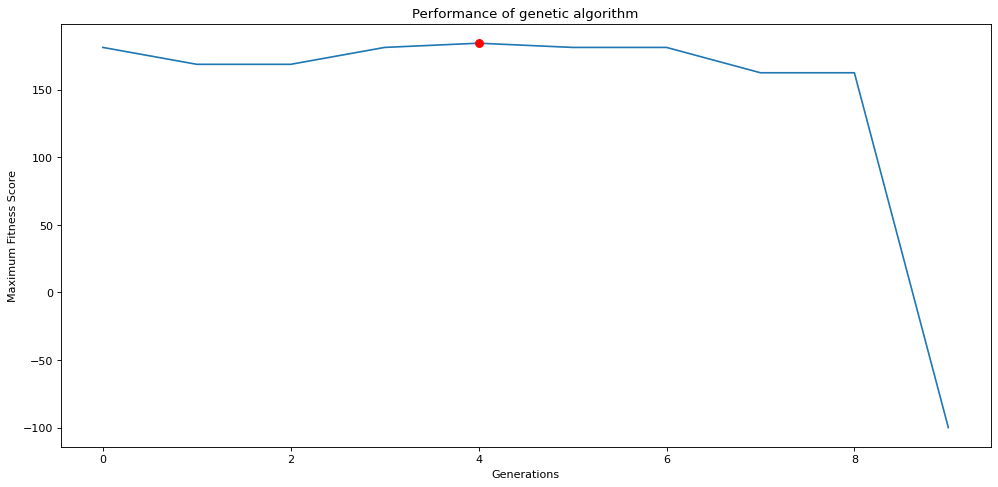

In [558]:
x = list(range(len(output[1])))
y = output[1]

globalMaxima_x = Population.bestResultInGeneration
globalMaxima_y = Population.bestPopulationFitness * 100

for i,val in enumerate(y):
  if val>=0:
    y[i]= val*100

figure(figsize=(15, 7), dpi=80)
plt.plot(x, y)
plt.plot(globalMaxima_x,globalMaxima_y, marker="o",markersize=7,color="red")
plt.xlabel('Generations')
plt.ylabel('Maximum Fitness Score')
plt.title('Performance of genetic algorithm')
plt.show()

In [559]:
results = pd.read_csv('results.csv')
display(results)


,generation,best_team_index,team_member_list,fitness_function
0,0,7,"[3, 0, 5, 4]",1.81250
1,1,7,"[3, 4, 7, 8]",1.68750
2,2,7,"[6, 2, 5, 3]",1.68750
3,3,1,"[0, 3, 4, 5]",1.81250
4,4,1,"[0, 3, 4, 5]",1.84375
5,5,1,"[0, 1, 3, 5]",1.81250
6,6,1,"[0, 1, 3, 5]",1.81250
7,7,1,"[0, 1, 2, 5]",1.62500
8,8,1,"[0, 2, 5, 8]",1.62500
9,9,1,"[2, 8]",-100.00000


In [560]:
print(colored("Best Team\n","blue"))
bestTeamResult = results.iloc[Population.bestResultInGeneration]
display(bestTeamResult)

Best Team



generation                     4
best_team_index                1
team_member_list    [0, 3, 4, 5]
fitness_function         1.84375
Name: 4, dtype: object

In [561]:
l = [i for i in bestTeamResult.team_member_list]
members = []
for i in l:
  try:
    members.append(int(i))
  except:
    pass

bestTeamSelected = pd.DataFrame()
lastGeneration = output[0]

for i in members:
  student_index = lastGeneration.random_selected_students[i]
  bestTeamSelected = bestTeamSelected.append(lastGeneration.students.loc[student_index])

print(colored("For your selected project : " +"'"+ str(projectSelected['project_name']+"'"),"blue"))
print(colored("\nWe suggest these team members","blue"))
display(bestTeamSelected[['Name','Email']])

For your selected project : 'Stock Prediction System'

We suggest these team members


,Name,Email
28,Vaishali Jadon,vaishalisinghj007@gmail.com
2,Hrishikesh Badakh,hrishikeshbadakh@gmail.com
35,Vedant Upganlawar,Vedantupganlawar05@gmail.com
48,Srushti Raybhoge,srushti.raybhoge1999@gmail.com
